In [4]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use("seaborn-v0_8") 

### Problem 2 Use logistic regression to predict the probability of default using income and balance. 
### Estimate the test error using

In [9]:
df = pd.read_csv('Default.csv', index_col = 0)

In [14]:
X_ = df[['balance', 'income', 'student']]
y = df['default']


In [66]:
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.62507,0,0
2,No,Yes,817.180407,12106.13470,0,1
3,No,No,1073.549164,31767.13895,0,0
4,No,No,529.250605,35704.49394,0,0
5,No,No,785.655883,38463.49588,0,0


### LOGISTICAL REGRESSION

In [67]:
# LOGISTICAL REGRESSION
#establish y output:
y= df.default2

# Assert x train input
X_train = df.balance.values.reshape(-1,1)

# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
clf = skl_lm.LogisticRegression(solver='newton-cg')

#fit the output
clf.fit(X_train_logreg,y_logreg)

print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)


LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00546217]]
intercept : [-10.59003277]


### Data visualization

C:\Users\Baron\AppData\Local\Temp\ipykernel_22600\3404038247.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'default', y = 'balance', data=df,  orient='v', ax=ax2, palette=c_palette)
C:\Users\Baron\AppData\Local\Temp\ipykernel_22600\3404038247.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'default', y = 'income', data=df, orient='v', ax=ax3, palette=c_palette)


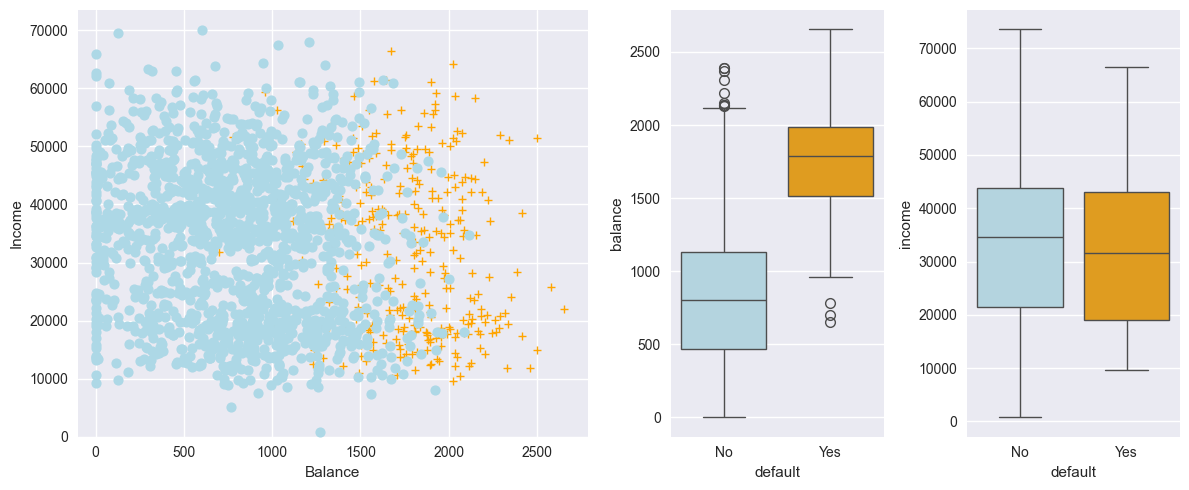

In [68]:
#SCATTER AND BOX PLOT

fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]

#Concat function used instead of append
df_ = pd.concat([df_no, df_yes])

# Creating the plots with + and negative
ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, c='lightblue', marker='o',
            linewidths=1)


#Labeling the Axis
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')


#Plotting the box Plots 
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(x = 'default', y = 'balance', data=df,  orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x = 'default', y = 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   default   10000 non-null  object 
 1   student   10000 non-null  object 
 2   balance   10000 non-null  float64
 3   income    10000 non-null  float64
 4   default2  10000 non-null  int64  
 5   student2  10000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 546.9+ KB


### MULITPLE LOGISTICAL REGRESSION


In [122]:
# MULITPLE LOGISTICAL REGRESSION

X_train_mlogreg = sm.add_constant(df[['balance', 'income']])

est_mlogreg = smf.logit("default2 ~ balance + income", data = df).fit()

est_mlogreg.summary2().tables[1]

y_pred_prob = est.predict(X_train_mlogreg)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


### Cross Validation: Validation Set Approach


In [182]:
# Cross Validation: Validation Set Approach
t_prop = 0.5 #50 Percent of the dataset 
p_order = np.arange(1,2)
r_state = np.arange(0,1)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

clf = skl_lm.LogisticRegression(solver='newton-cg')

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df.default2.values.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df.default2, test_size=t_prop, random_state=Y[i,j])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, y_pred)
    print(Z)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')
#
# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')
for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(-1,1)
    ax.set_xticks(range(5,11,5));

accuracy = accuracy_score(y[:5000], y_pred)
print("Accuracy:", accuracy)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
print(Z)

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')
#
# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(-1,1)
    ax.set_xticks(range(2,11,2));

accuracy = accuracy_score(y[:5000], y_pred)
print("Accuracy:", accuracy)

In [30]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
clf = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df.balance.values.reshape(-1,1))
    score = cross_val_score(clf, X_poly, df.income, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)


KeyboardInterrupt

